#Installing Pycaret

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 122 kB 53.8 MB/s 
     |████████████████████████████████| 17.9 MB 497 kB/s 
     |████████████████████████████████| 262 kB 26.6 MB/s 
     |████████████████████████████████| 1.7 MB 35.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 167 kB 59.2 MB/s 
     |████████████████████████████████| 2.0 MB 37.6 MB/s 
     |████████████████████████████████| 1.3 MB 34.4 MB/s 
     |████████████████████████████████| 10.4 MB 29.7 MB/s 
     |████████████████████████████████| 6.8 MB 25.7 MB/s 
     |████████████████████████████████| 

In [ ]:
! pip uninstall Jinja2 --yes
! pip install Jinja2

Found existing installation: Jinja2 2.11.3
Uninstalling Jinja2-2.11.3:
  Successfully uninstalled Jinja2-2.11.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have fo

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


#Important Libs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.manifold import TSNE
from IPython.core.pylabtools import figsize
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.utils.multiclass import unique_labels
from sklearn.cluster import DBSCAN

#Reading Data

In [ ]:
AnomD = pd.read_csv('Dataset_to_be_used_in_anomaly_detection.csv')
performance = pd.read_csv('Dataset_to_be_used_in_performance_comparison.csv')

In [ ]:
AnomD.drop('Unnamed: 0' ,axis =1, inplace=True)

In [ ]:
from pycaret.anomaly import *
ano1 = setup(AnomD, session_id=123, log_experiment=True, experiment_name='anomaly1')

,Description,Value
0,session_id,123
1,Original Data,"(98, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(98, 4)"
9,CPU Jobs,-1


2022/07/04 23:43:30 INFO mlflow.tracking.fluent: Experiment with name 'anomaly1' does not exist. Creating a new experiment.


In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


#Helping Functions

In [ ]:
def models(model):
  ml_model = create_model(model,fraction=0.05)
  res = assign_model(ml_model)
  anomalies = res[res['Anomaly'] == 1]
  results = res.iloc[:,:-2]
  plot_model(ml_model)
  return anomalies, res

In [ ]:
def plot2dtsne(x,y):
  data=x                              
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data) 
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  plt.figure(figsize=(6, 5))
  colors = 'g' ,'orange' 
  for i, c, label in zip(target_ids, colors, classes):
      plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
  plt.xlabel('TSNE COMP1')
  plt.ylabel('TSNE COMP2')
  plt.legend()
  plt.show()

In [ ]:
def graphs(mr,anomalies):
 figsize(10,7)
 results = mr.iloc[:,:-2]
 c=1
 plot2dtsne(mr.iloc[:,:-2],mr.iloc[:,-2])
 for column in results.columns:
   plt.subplot(2,2,c)
   plt.plot(mr[column])
   plt.scatter(anomalies.index,anomalies[column],c = 'r', marker ='o', s = 50)
   plt.title(" ".join(column.split('_')))
   c = c+1

#SVM

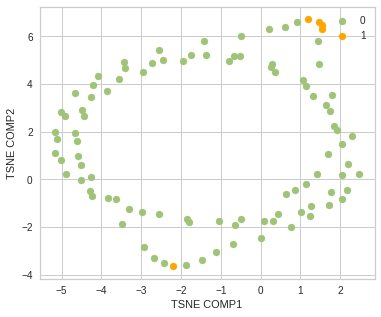

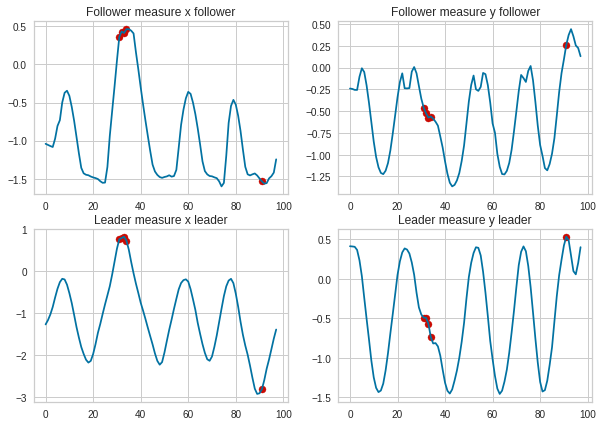

In [ ]:
anomalies_SVM, SVM_results=models('svm')
graphs(SVM_results,anomalies_SVM)

#KNN

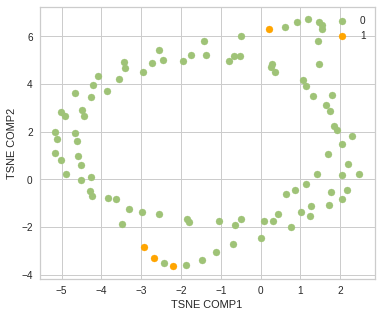

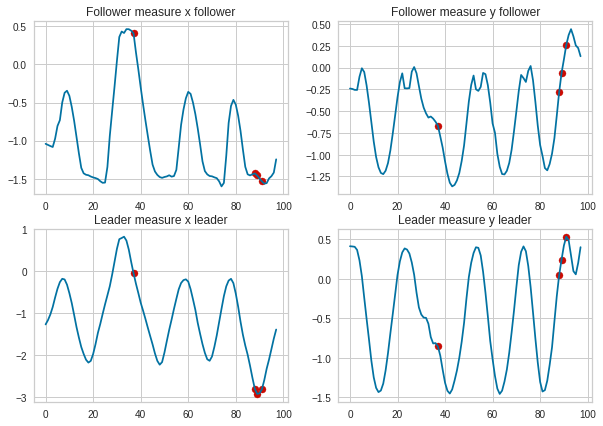

In [ ]:
anomalies_KNN, KNN_results=models('knn')
graphs(KNN_results,anomalies_KNN)

#PCA

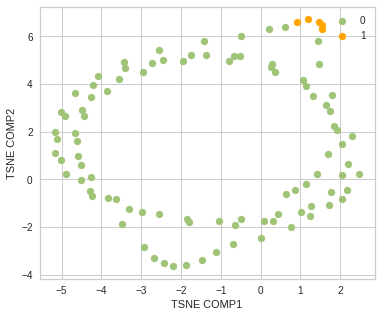

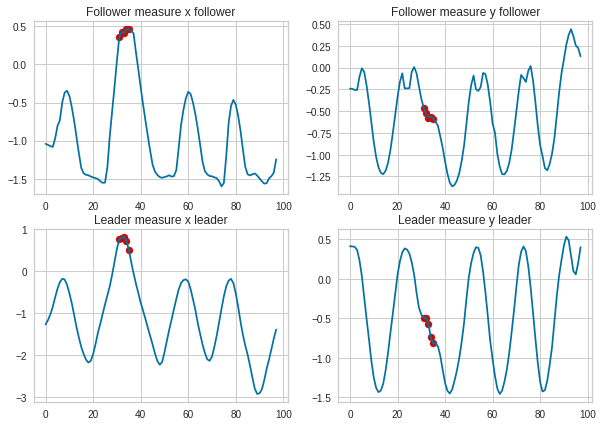

In [ ]:
anomalies_PCA, PCA_results=models('pca')
graphs(PCA_results,anomalies_PCA)

#DBSCAN

In [ ]:
model = DBSCAN(eps=0.5, min_samples=7)
ypred = model.fit_predict(AnomD)
dbscan_results=np.where(ypred==-1,1,ypred)

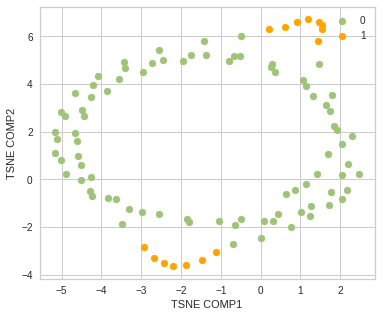

In [ ]:
plot2dtsne(AnomD,dbscan_results)

#Performance Evaluation

In [ ]:
models_results=[SVM_results,KNN_results,PCA_results,dbscan_results]
models_names=['SVM','KNN','PCA','DBSCAN']
def eval(res,n,p):
  for i,z in zip(res,n):
    if z=='DBSCAN':
      true_label = p.iloc[:,-1]
      print(z,classification_report(true_label,label))
    else:
      label=i.iloc[:,-2]
      true_label = p.iloc[:,-1]
      print(z,classification_report(true_label,label))

In [ ]:
eval(models_results,models_names,performance)

SVM               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98

KNN               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        86
         1.0       0.75      0.25      0.38        12

    accuracy                           0.90        98
   macro avg       0.83      0.62      0.66        98
weighted avg       0.89      0.90      0.87        98

PCA               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98

DBSCAN 